In [4]:
import numpy as np
import va_plots

In [5]:
TREINO = 2
FOLD = 1

In [6]:
log_folder = 'mask_voas_v2'
model_name = 'MaskVoasCNNv2'
metrics_dir = './Evaluation_Data/' + log_folder + '_treino' + str(TREINO) + '_kfold_' + str(FOLD) + '.h5'
mix_metrics,sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)

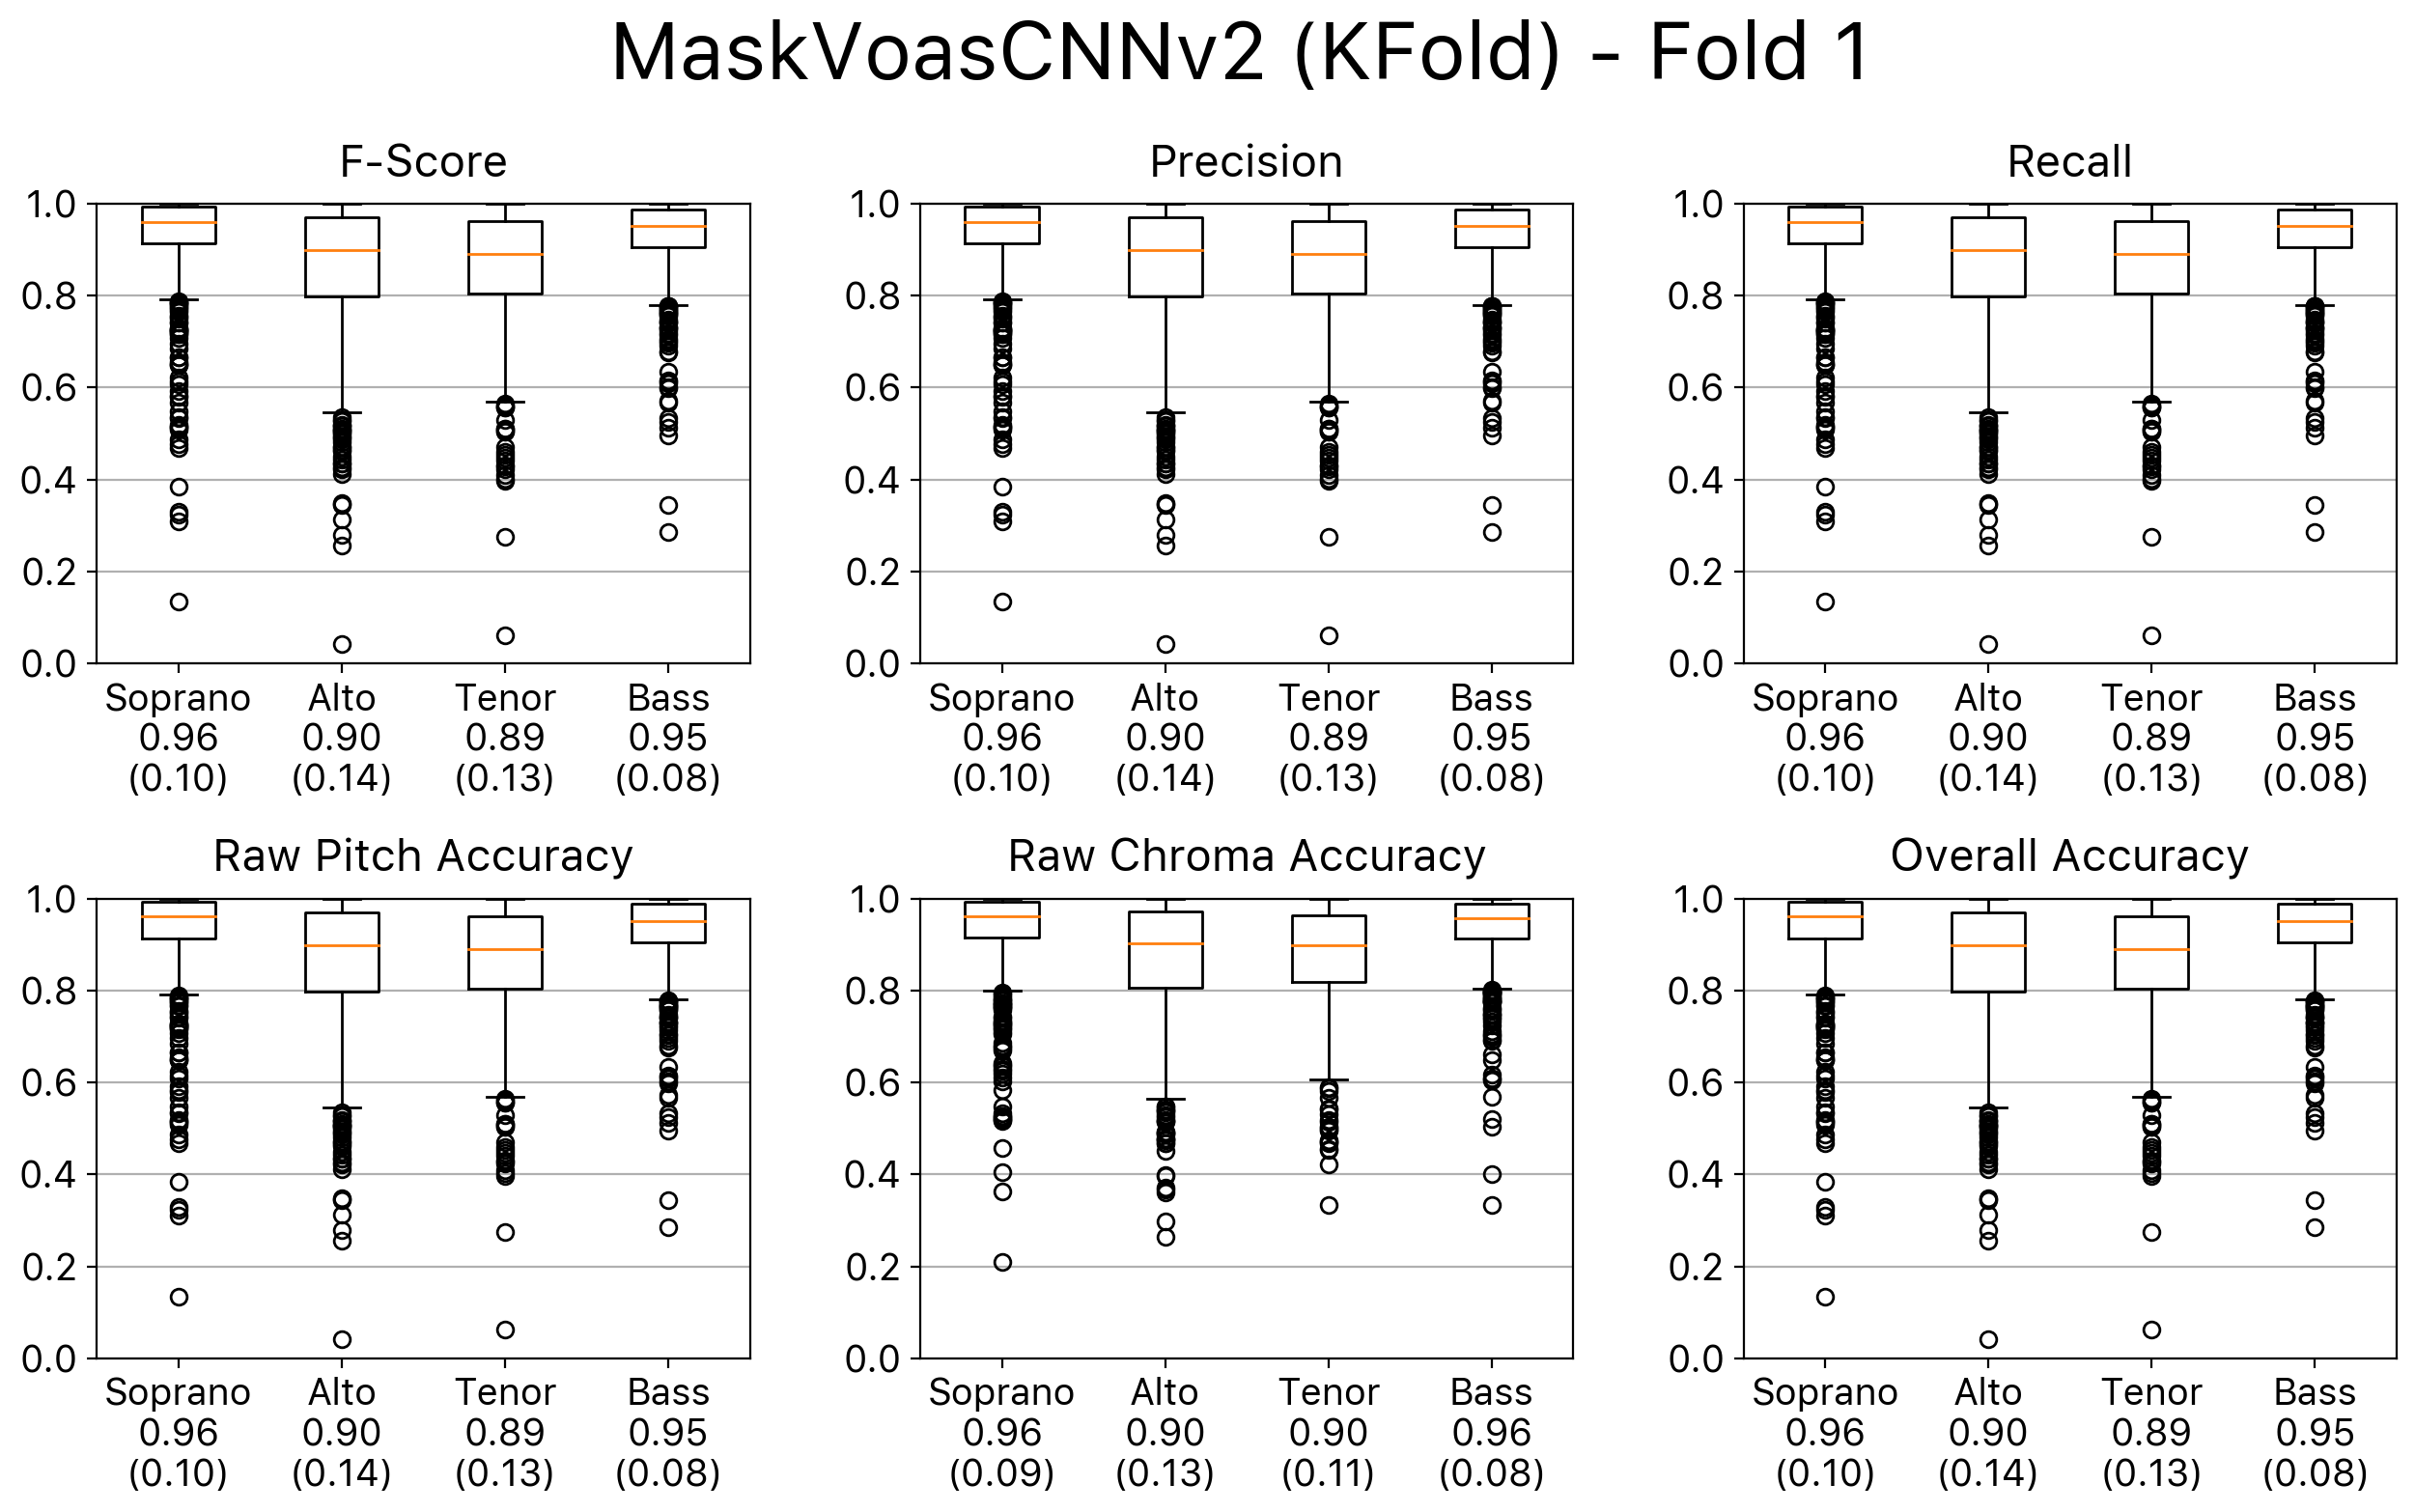

In [7]:
va_plots.evaluation_boxplots(sop_metrics,
                             alto_metrics,
                             ten_metrics,
                             bass_metrics,
                             title=model_name + ' (KFold) - Fold ' + str(FOLD))